# Track trains from Düsseldorf

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 20)
import requests
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
#My local key:
with open('DB_API_key.txt','r') as file:
    API_Key =  file.readline()

## Finding station id for Düsseldorf station:

In [3]:
params = {}
params['lang'] = 'en'
params['authKey'] = API_Key
params['input'] = 'Düsseldorf Hbf'
params['format'] ='json'
r = requests.get('https://open-api.bahn.de/bin/rest.exe/location.name',params = params)
result = r.json()
station = result['LocationList']['StopLocation'][0]
station

{'id': '008000085',
 'lat': '51.219960',
 'lon': '6.794317',
 'name': 'Düsseldorf Hbf'}

## Getting the departure board for Düsseldorf, for the time I'm leaving

In [4]:
params = {}
params['lang'] = 'en'
params['authKey'] = 'DBhackFrankfurt0316'
params['id'] = station['id']
params['date'] = '2017-10-14'
params['time'] = '20%0a30'
params['format'] ='json'
r = requests.get('https://open-api.bahn.de/bin/rest.exe/departureBoard',params = params)
result = r.json()
departure_board = result['DepartureBoard']['Departure']

In [5]:
df_departure_board = pd.DataFrame(departure_board)
df_departure_board.get_value(0,'JourneyDetailRef')

{'ref': 'https://open-api.bahn.de/bin/rest.exe/v1.0/journeyDetail?ref=346059%2F132308%2F838414%2F303854%2F80%3Fdate%3D2017-10-14%26station_evaId%3D8000085%26station_type%3Ddep%26authKey%3DDBhackFrankfurt0316%26lang%3Den%26format%3Djson%26'}

In [6]:
df_departure_board = pd.DataFrame(departure_board)
df_departure_board.head()

,JourneyDetailRef,date,direction,name,stop,stopid,time,track,tyoe,type,tyte
0,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Köln Hbf,ICE 846,Düsseldorf Hbf,8000085,20:08,16,NaN,ICE,NaN
1,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Dortmund Hbf,EC 114,Düsseldorf Hbf,8000085,20:11,18,NaN,EC,NaN
2,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Karlsruhe Hbf,ICE 605,Düsseldorf Hbf,8000085,20:18,16,NaN,ICE,NaN
3,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Frankfurt(Main)Hbf,IC 2315,Düsseldorf Hbf,8000085,20:27,16,NaN,IC,NaN
4,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Dortmund Hbf,ICE 514,Düsseldorf Hbf,8000085,20:33,18,NaN,ICE,NaN


In [7]:
"""Correcting some errors in the API output"""
def merge_cols(df,target_col,other_col):
    if other_col in df:
        df[target_col] = df[target_col].fillna(df[other_col])
        df.drop(other_col,axis = 1,inplace = True)    
 
merge_cols(df_departure_board,'type','tyte')
merge_cols(df_departure_board,'type','tyoe')


In [8]:
df_departure_board.to_csv('departure_board.csv',sep = ';')

### This is (hopefully) what I will be seeing when I get to the Düsseldorf station:

In [9]:
df_departure_board.ix[:,(df_departure_board.columns != 'JourneyDetailRef') & (df_departure_board.columns != 'stopid')]

,date,direction,name,stop,time,track,type
0,2017-10-14,Köln Hbf,ICE 846,Düsseldorf Hbf,20:08,16,ICE
1,2017-10-14,Dortmund Hbf,EC 114,Düsseldorf Hbf,20:11,18,EC
2,2017-10-14,Karlsruhe Hbf,ICE 605,Düsseldorf Hbf,20:18,16,ICE
3,2017-10-14,Frankfurt(Main)Hbf,IC 2315,Düsseldorf Hbf,20:27,16,IC
4,2017-10-14,Dortmund Hbf,ICE 514,Düsseldorf Hbf,20:33,18,ICE
5,2017-10-14,Hamburg Hbf,ICE 26,Düsseldorf Hbf,20:39,NaN,ICE
6,2017-10-14,Frankfurt(Main)Hbf,ICE 221,Düsseldorf Hbf,20:48,16,ICE
7,2017-10-14,Wien Hbf (Autoreisezuganlage),EN 40421,Düsseldorf Hbf,20:54,19,EN
8,2017-10-14,Innsbruck Hbf,EN 421,Düsseldorf Hbf,20:54,19,EN
9,2017-10-14,Köln Hbf,ICE 544,Düsseldorf Hbf,21:08,16,ICE


## Getting journey details for all trains

In [11]:
df_journeys = pd.DataFrame()

for index,line in df_departure_board.iterrows():  
 
    #This is how you get data about a specific journey:
    r = requests.get(line['JourneyDetailRef']['ref'])
    journey = r.json()['JourneyDetail']
    df_journey = pd.DataFrame(journey['Stops']['Stop'])
    df_journey['train'] = line['name']
    
    df_journeys = df_journeys.append(df_journey,ignore_index = True) 
    


In [13]:
df_journeys.head()

,arrDate,arrTime,depDate,depTime,id,lat,lon,name,routeIdx,track,train
0,NaN,NaN,2017-10-14,15:35,8011102,52.548961,13.388516,Berlin Gesundbrunnen,0,7 D - G,ICE 846
1,2017-10-14,15:40,2017-10-14,15:49,8098160,52.525589,13.369549,Berlin Hbf (tief),1,4 D - G,ICE 846
2,2017-10-14,15:59,2017-10-14,16:01,8010404,52.534471,13.197531,Berlin-Spandau,2,3 A - D,ICE 846
3,2017-10-14,16:52,2017-10-14,16:53,8006552,52.429495,10.787784,Wolfsburg Hbf,3,1,ICE 846
4,2017-10-14,17:28,2017-10-14,17:31,8000152,52.376764,9.741017,Hannover Hbf,4,12,ICE 846


In [14]:
df_journeys['lat'] = pd.to_numeric(df_journeys['lat'])
df_journeys['lon'] = pd.to_numeric(df_journeys['lon'])

### convert the journey data frame to geopandas dataframe

In [15]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df_journeys.lon, df_journeys.lat)]
df = df_journeys.drop(['lon', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [16]:
def create_date_strings(row,date_col,time_col):
    if not isinstance(row[date_col],str):
        return np.nan
    
    s = '%s %s' % (row[date_col],row[time_col])
    return s

def create_date(df,date_col,time_col):
    date_strings = df.apply(func = create_date_strings,axis = 1,args = (date_col,time_col))
    dates = pd.to_datetime(date_strings,format = "%Y-%m-%d %H:%M")
    return dates

geo_df['arrival'] = create_date(df = geo_df,date_col = 'arrDate',time_col = 'arrTime')
geo_df['departure'] = create_date(df = geo_df,date_col = 'depDate',time_col = 'depTime')
geo_df.drop(labels = ['arrDate','arrTime','depDate','depTime'],axis = 1,inplace=True)



In [17]:
geo_df.head()

,id,name,routeIdx,track,train,geometry,arrival,departure
0,8011102,Berlin Gesundbrunnen,0,7 D - G,ICE 846,POINT (13.388516 52.548961),NaT,2017-10-14 15:35:00
1,8098160,Berlin Hbf (tief),1,4 D - G,ICE 846,POINT (13.369549 52.525589),2017-10-14 15:40:00,2017-10-14 15:49:00
2,8010404,Berlin-Spandau,2,3 A - D,ICE 846,POINT (13.197531 52.534471),2017-10-14 15:59:00,2017-10-14 16:01:00
3,8006552,Wolfsburg Hbf,3,1,ICE 846,POINT (10.787784 52.429495),2017-10-14 16:52:00,2017-10-14 16:53:00
4,8000152,Hannover Hbf,4,12,ICE 846,POINT (9.741016999999999 52.376764),2017-10-14 17:28:00,2017-10-14 17:31:00


In [29]:
from shapely.geometry import LineString

#Aggregate these points with the GroupBy
df = geo_df.groupby(['train'])['geometry'].apply(lambda x: LineString(x.tolist()))
df = gpd.GeoDataFrame(df, geometry='geometry')
df.head()

,geometry
train,
EC 114,"LINESTRING (13.154464 47.318534, 13.19496 47.3..."
EN 40421,"LINESTRING (6.794316999999999 51.21996, 6.9587..."
EN 421,"LINESTRING (6.794316999999999 51.21996, 6.9587..."
IC 2209,"LINESTRING (7.158802000000001 53.624314, 7.160..."
IC 2307,LINESTRING (9.935174999999999 53.5526969999999...


## Plotting my journey

In [55]:
def plot_station_names(row,ax,times = True):
    
    point = row['geometry']
    coords = point.coords.xy
    
    x = coords[0][0]
    y = coords[1][0]
    
    name = '  %s' % row['name']
    
    if times:
        
        arrival = row['arrival']
        departure = row['departure']
        
        if arrival is pd.NaT:
            #Start of journey:
            time_string = departure.strftime("%Y-%m-%d %H:%M")
        elif departure is pd.NaT:
            #End of journey:
            time_string = arrival.strftime("%Y-%m-%d %H:%M")
        else:
            #Intermediate station:
            #time_string = arrival.strftime("%H:%M")
            return
        
        #name+= ' %s' % time_string
    
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    
    ax.text(x,y,name,fontdict = font)
    

In [56]:
df_world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

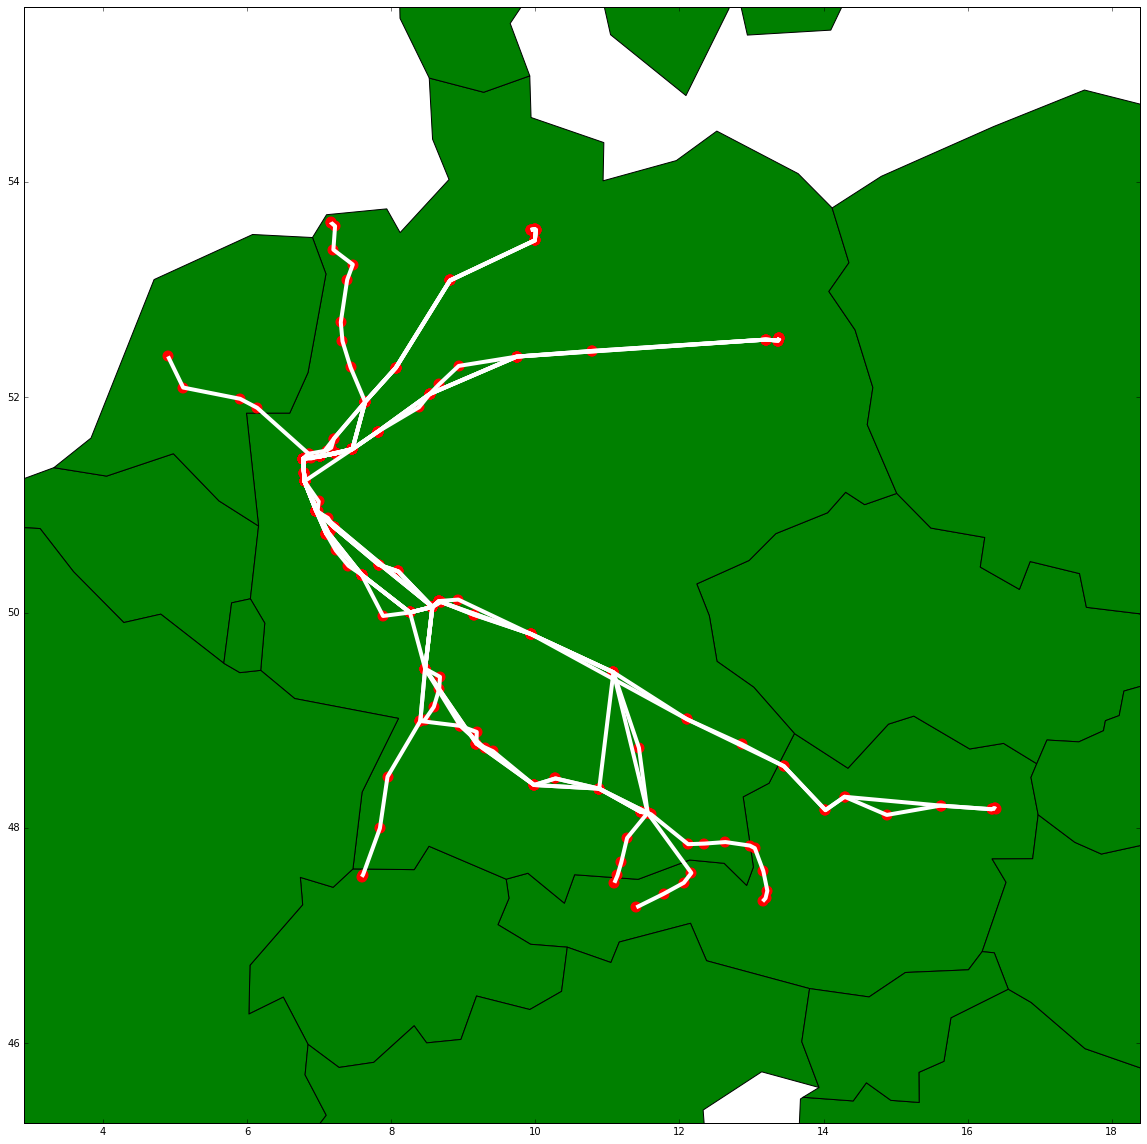

In [58]:
fig,ax = plt.subplots()

df_world_map.plot(ax = ax,color = 'green')
df.plot(ax = ax,color = 'white',linewidth = 4)
geo_df.plot(ax = ax,color = 'red',markersize = 100)


#geo_df.apply(func = plot_station_names,axis = 1,args = (ax,))

bounds = geo_df.geometry.bounds
a = ax.set_xlim([bounds.minx.min()-2, bounds.maxx.max()+2])
a = ax.set_ylim([bounds.miny.min()-2, bounds.maxy.max()+2])
